### Text Classification Algorithms with Traditional Machine Learning

Text classification is one of the backbone tasks in Natural Language Processing powering everything from spam detection to sentiment analysis to customer support automation. What’s exciting is how many different algorithms can be used to solve it, each with its strengths and weakness. With all the buzz around transformers and large language models, it’s easy to forget how powerful traditional machine learning can be for text classification. In many real-world scenarios, classic models still offer huge advantages for small to medium datasets

There are so many Algorithm to choose from but a good rule of thumb is to start simple and scale up only when needed:
* Small datasets (<10k rows), start with Naive Bayes and other simple models like Logistic Regression, KNN, etc
* Medium-sized datasets (<100k rows), start with Logistic Regression and other Tree based model like Decision Trees, Random Forest, Gradient Boosted Trees, etc
* Large datasets (<1M rows), start with Gradient Boosted Trees and potentiuall move on to modern NLP techniques with transformer-based models and LLMs

##### Naive Bayes is a technique that's commonly used for text classification. 
It performs well in many real-world applications such as spam filtering, document categorization and sentiment analysis.
There are three types of Naive Bayes Model: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes
- Based on Bayes Theorem, which assumes conditionally independent features.
- The “naive” in Naive Bayes comes from its assumption that all features are independent. For example, it treats being “Asap,” “” and “$” as unrelated traits, even if they’re not in reality.
- Continuous features are normally distributed, the model assumes the values within each class follow a normal (Gaussian) distribution.
- For categorical variables, the model assumes each feature takes on discrete values according to a multinomial distribution within each class.
- All Features Are Equally Important
  

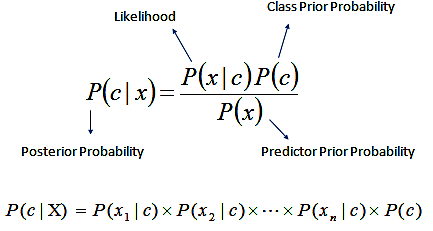

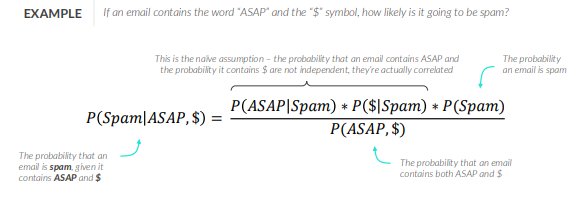


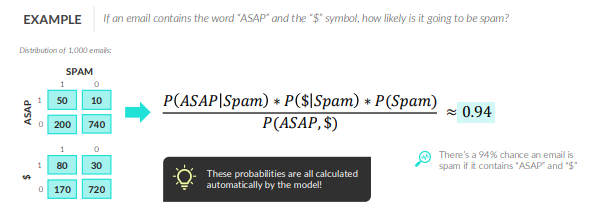

<center>
    <h3>
        Word Count
    </h3>
</center>


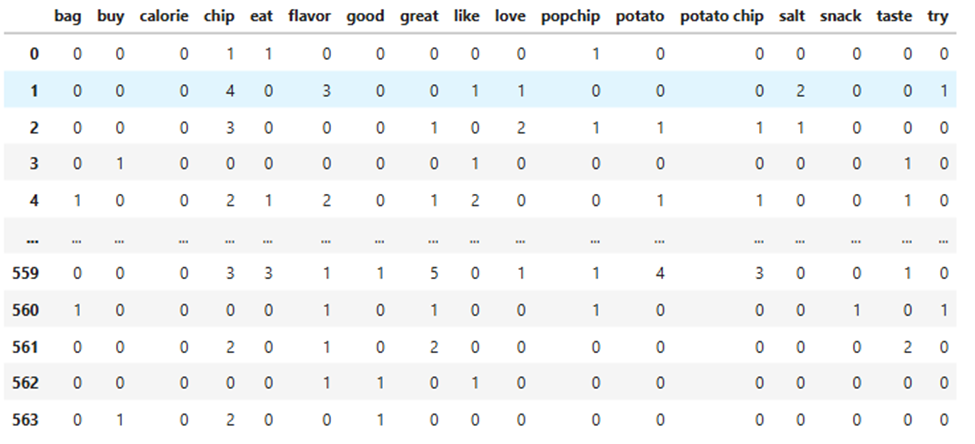


### Multinomial Naive Bayes
Multinomial Naive Bayesis used when features represent the frequency of terms (such as word counts) in a document. It is commonly applied in text classification, where term frequencies are important.
- Input should be CountVectorizer or TfidfVectorizer
- THere are no parameters to tune with Naive Bayes

In [18]:
# import libraries
import pandas as pd
import spacy
# download the spacy model
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import maven_text_preprocessing

In [15]:
# read in the pop chip reviews

reviews = pd.read_excel('./Natural+Language+Processing+in+Python/Course Materials/Data/Popchip_Reviews.xlsx')
reviews.head(2)



,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...


In [16]:
# helper functions from text preprocessing section
def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True)
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    return output

def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(output)

def clean_and_normalize(series):
    output = lower_replace(series)
    output = output.apply(token_lemma_nonstop)
    return output

In [19]:
reviews['Text_Clean'] = clean_and_normalize(reviews.Text)

In [20]:
reviews.head()

,Id,UserId,Rating,Priority,Title,Text,Text_Clean
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,popchip bomb use parmesan garlic scoop cotta...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,like puff nature chip make unique chip market ...
2,23691,A30NYUHEDLWI0Y,5,Low,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,love chip big fan potato chip not discover p...
3,23692,A2NU55U9LKTB5J,3,High,Not somthing I would crave,"These tasted like potatoe stix, that we got in...",taste like potatoe stix get grade school lunch...
4,23693,A225F7QFP5LIW2,5,Low,healthy and delicious,These chips are great! They look almost like ...,chip great look like flattened rice cake tas...


In [9]:
# cv, naive bayes
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=.2)
X = cv.fit_transform(reviews.Text_Clean)

X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

X_df

,bag,buy,calorie,chip,eat,flavor,good,great,like,love,popchip,potato,potato chip,salt,snack,taste,try
0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,4,0,3,0,0,1,1,0,0,0,2,0,0,1
2,0,0,0,3,0,0,0,1,0,2,1,1,1,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,2,1,2,0,1,2,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,0,0,3,3,1,1,5,0,1,1,4,3,0,0,1,0
560,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1
561,0,0,0,2,0,1,0,2,0,0,0,0,0,0,0,2,0
562,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


In [11]:
y = reviews.Priority
y

0       Low
1       Low
2       Low
3      High
4       Low
       ... 
559     Low
560     Low
561     Low
562     Low
563     Low
Name: Priority, Length: 564, dtype: object

In [12]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.2, random_state=42)

# Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
# Predict
y_pred = nb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8407079646017699
              precision    recall  f1-score   support

        High       0.60      0.16      0.25        19
         Low       0.85      0.98      0.91        94

    accuracy                           0.84       113
   macro avg       0.73      0.57      0.58       113
weighted avg       0.81      0.84      0.80       113

